<a href="https://colab.research.google.com/github/faro7ah/python_project/blob/main/PCA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import*
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from matplotlib import cm


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
161,7,102,74,40,105,37.2,0.204,45,0
107,4,144,58,28,140,29.5,0.287,37,0
197,3,107,62,13,48,22.9,0.678,23,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Split Data:

In [ ]:

from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=7)


In [ ]:

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

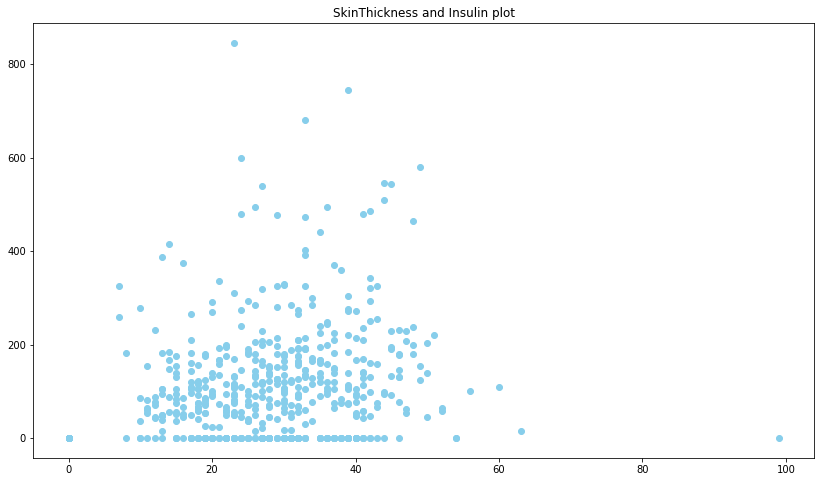

In [ ]:
plt.figure(figsize=(14,8));
plt.scatter(data= df, x='SkinThickness', y='Insulin', color='skyblue')
plt.title("SkinThickness and Insulin plot");


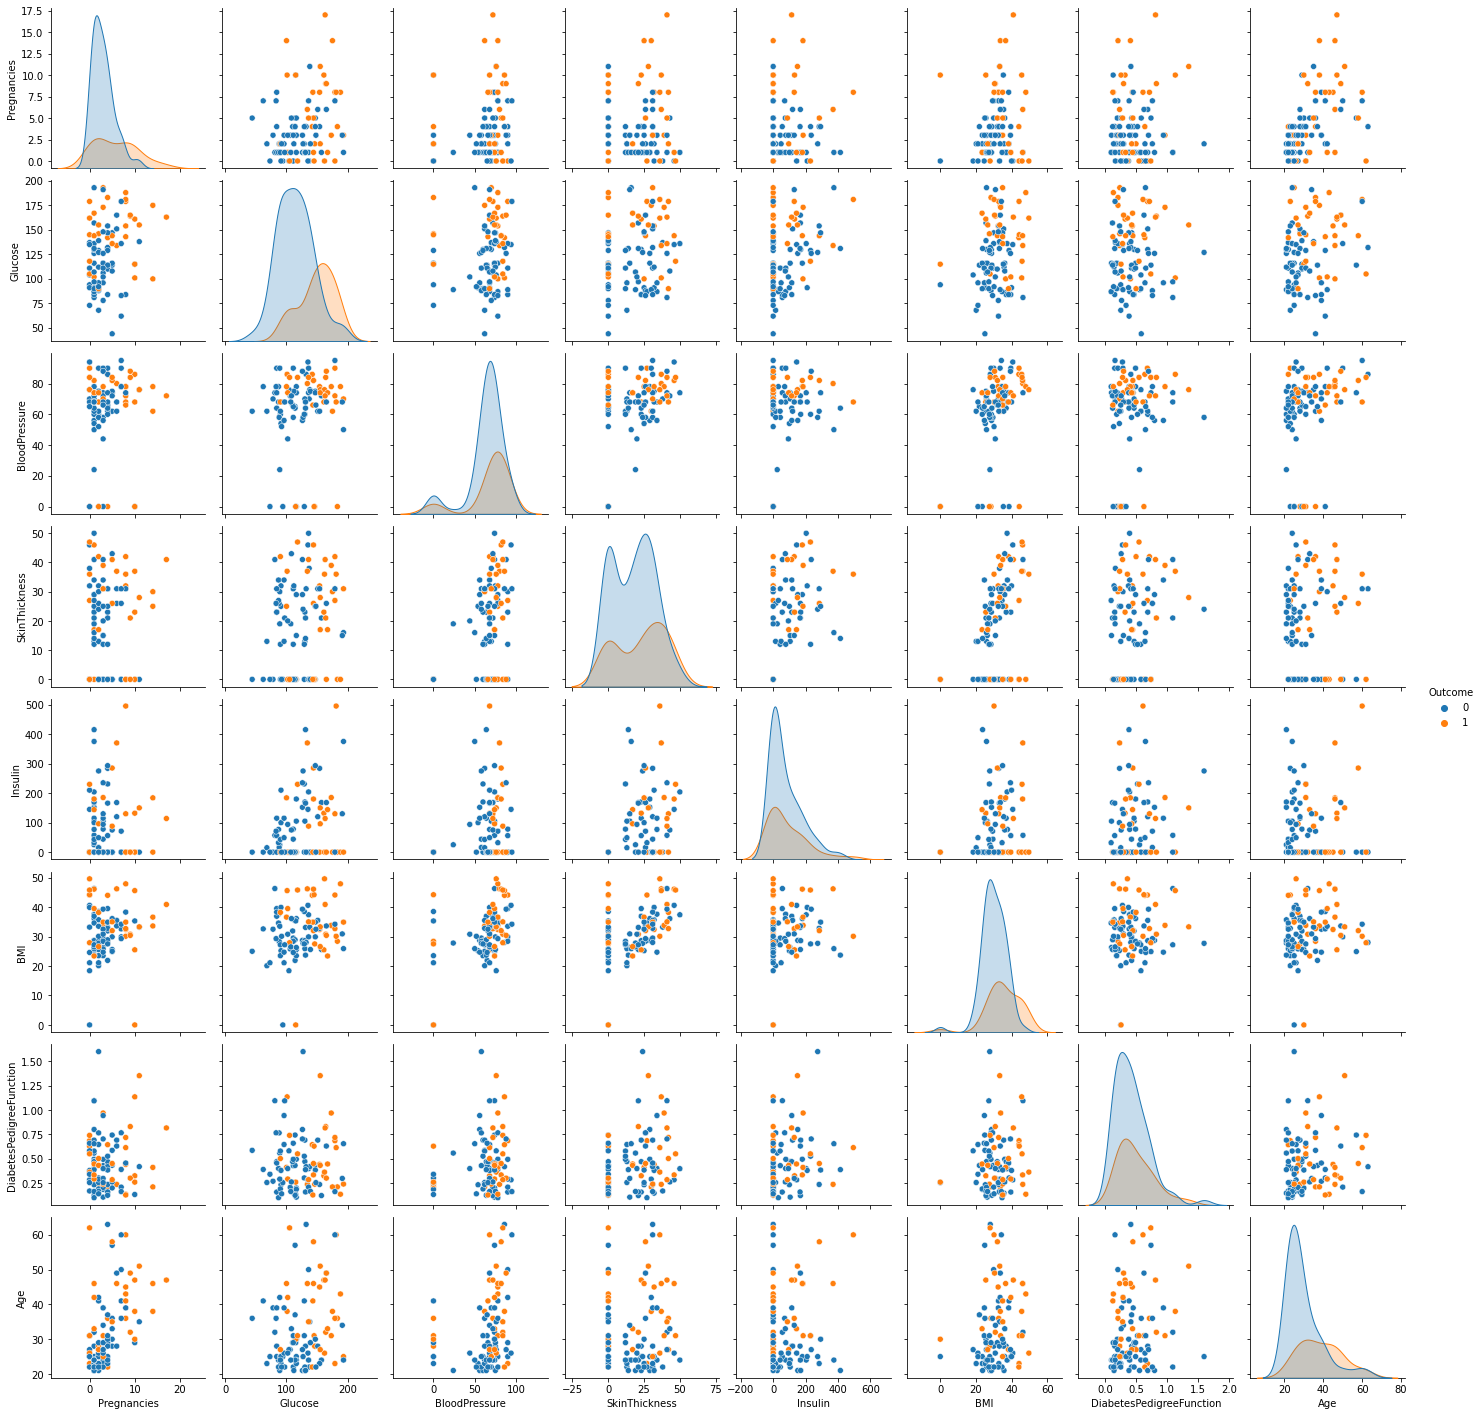

In [ ]:
import seaborn as sns

sns.pairplot(df.sample(100), hue='Outcome');

# baseline


In [ ]:
df['Outcome'].value_counts(normalize=True)


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [41]:
 def baseline_model(n_predictions, value_to_predict):
     """
     just predict a single value (e.g. mean) for everything
     """
     baseline_preds = []
     for i in range(n_predictions):
         baseline_preds.append(value_to_predict)
     return pd.Series(baseline_preds)

 n_predictions = len(y_test)  # how many predictions to make?
 baseline_value = y_train.value_counts().index[0]  # what value to predict? 
 # make predictions baseline
 baseline_preds = baseline_model(n_predictions, baseline_value)
 baseline_preds


0      0
1      0
2      0
3      0
4      0
      ..
149    0
150    0
151    0
152    0
153    0
Length: 154, dtype: int64

In [42]:
 baseline_acc = accuracy_score(y_test, baseline_preds)
 print("Baseline Accuracy is {:.2f}%".format(baseline_acc*100))

Baseline Accuracy is 62.99%


# Scale Data:


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
#Standardize features by removing the mean and scaling to unit variance
sc=StandardScaler()

In [46]:
#Compute the mean and std to be used for later scaling
#Fit to data, then transform it.
x_train_scaled=sc.fit_transform(X_train)

In [47]:
x_test_scaled=sc.transform(X_test)

# LogisticRegression Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept=True)


In [ ]:
lr.fit(x_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds_lr= lr.predict(x_test_scaled)


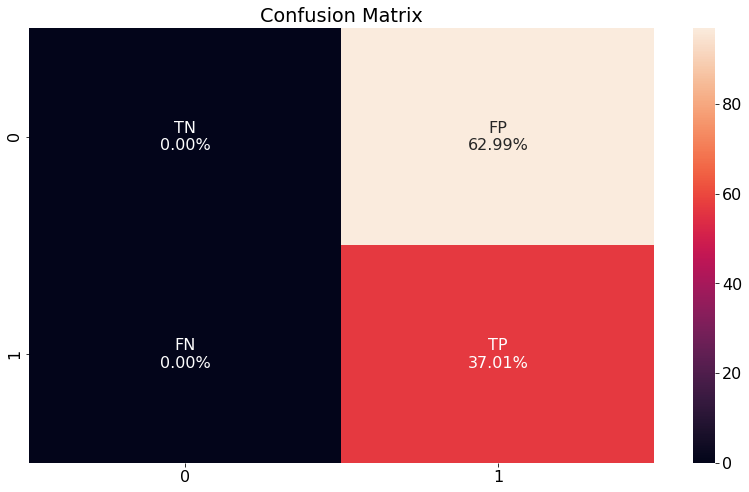

In [ ]:
y_pred = lr.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");

In [ ]:
acc = accuracy_score(y_test, preds_lr)
print("Logistic Regression Accuracy is {:.2f}%".format(acc*100))

Logistic Regression Accuracy is 78.57%


# GridSearchCV:


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid ={'solver': ['liblinear'],
             'fit_intercept':[True, False]}
#Make GridSearchCV
grid = GridSearchCV(lr, param_grid,cv=10 )
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#fit X_train and y_train into grid_search
grid_search= grid.fit(X_train, y_train)
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_


{'fit_intercept': True, 'solver': 'liblinear'}

In [ ]:
best_score = grid_search.best_score_
best_score


0.7719989423585404

## it is illustrated that Logistic Regression shows the highest accuracy with 78.57% compared to Baseline.

# PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()


In [ ]:
x_train_pca= pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
pca.explained_variance_ratio_


array([0.2597798 , 0.21722124, 0.12166712, 0.1120307 , 0.09929738,
       0.08550729, 0.05474518, 0.04975129])

# Use Your Principal Components for a Logistic Regression Model:

In [ ]:
lr2 = LogisticRegression()

lr2.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

preds = lr2.predict(x_test_pca)

In [ ]:
accuracy_pca=accuracy_score(y_test, preds)
accuracy_pca


0.7857142857142857

Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA:

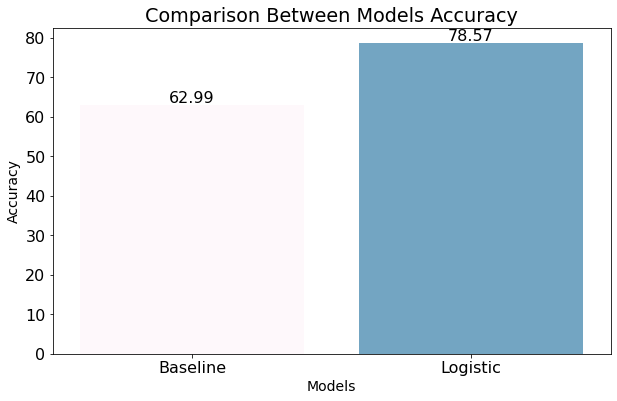

In [ ]:
plt.figure(figsize=(10, 6))
names = ['Baseline','Logistic']
values = [baseline_acc*100 , acc*100]
cs = cm.PuBuGn(np.arange(2)/2.)

splot=sns.barplot(x=names,y=values, palette=cs)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparison Between Models Accuracy');


Baseline showed the lowest accuracy, and previous Logistic Regression Model without PCA and with PCA shows the same accuracy rate of 0.78.

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)
 - [Scree Plot](https://stats.stackexchange.com/questions/12819/how-to-draw-a-scree-plot-in-python)

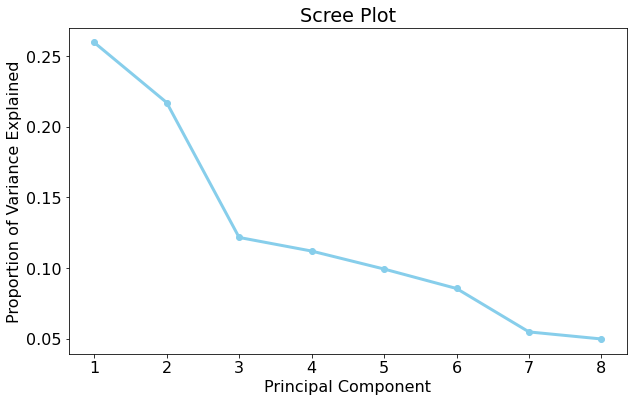

In [ ]:

plt.figure(figsize=(10,6))

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=3, color='skyblue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

From the prevoius chart, wecan see that the first 2 components contributes to 46% of the total variance. So it’s good enough to choose only 2 components.